In [ ]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

#reading data
absenteeism_data = pd.read_csv('Absenteeism_at_work.csv')
print(absenteeism_data.head(5))

   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

  Work load Average/day   ...  Disciplinary failure  Education  Son  \
0  

In [ ]:
absenteeism_data.rename(columns = {'Work load Average/day ':'Workload'}, inplace = True)

In [ ]:
list(absenteeism_data)

['ID',
 'Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Workload',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [ ]:
absenteeism_data['Workload'] = absenteeism_data['Workload'].str.replace(',', '').astype(float)

In [ ]:
#descriptive statistics
absenteeism_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Workload,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


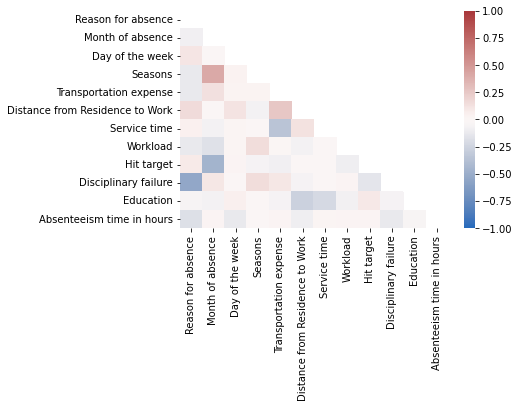

In [ ]:
corrMatrix = absenteeism_data.corr()
heatmap_1=corrMatrix.drop(['Pet','Weight', 'Age', 'Social drinker', 'Social smoker', 'Height', 'Body mass index', 'Son', 'ID']).drop(['Pet','Weight', 'Age', 'Social drinker', 'Social smoker', 'Height', 'Body mass index', 'Son', 'ID'],axis=1)
mask = np.triu(np.ones_like(heatmap_1, dtype=bool))
sns.heatmap(heatmap_1, annot=False, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [ ]:
# All columns except ID and Absenteeism in hours are descriptive features
descriptive_features = absenteeism_data.iloc[:,1:-1]
descriptive_features

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Workload,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,26,7,3,1,289,36,13,33,239554.0,97,0,1,2,1,0,1,90,172,30
1,0,7,3,1,118,13,18,50,239554.0,97,1,1,1,1,0,0,98,178,31
2,23,7,4,1,179,51,18,38,239554.0,97,0,1,0,1,0,0,89,170,31
3,7,7,5,1,279,5,14,39,239554.0,97,0,1,2,1,1,0,68,168,24
4,23,7,5,1,289,36,13,33,239554.0,97,0,1,2,1,0,1,90,172,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264604.0,93,0,1,2,1,0,1,90,172,30
736,11,7,3,1,235,11,14,37,264604.0,93,0,3,1,0,0,1,88,172,29
737,0,0,3,1,118,14,13,40,271219.0,95,0,1,1,1,0,8,98,170,34
738,0,0,4,2,231,35,14,39,271219.0,95,0,1,2,1,0,2,100,170,35


In [ ]:
# Absenteeism time in hours is the Target
target_feature = absenteeism_data.iloc[:,-1:]
target_feature

,Absenteeism time in hours
0,4
1,0
2,2
3,4
4,2
...,...
735,8
736,4
737,0
738,0


In [ ]:
descriptive_features.dtypes

Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Workload                           float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
dtype: object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Feature: 1, Score: 0.21016
Feature: 2, Score: 0.09722
Feature: 3, Score: 0.12122
Feature: 4, Score: 0.05550
Feature: 5, Score: 0.04105
Feature: 9, Score: 0.11664
Feature: 10, Score: 0.09337


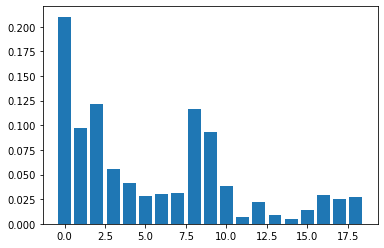

In [ ]:
#randome forrest to identify important features
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators=200)
classifier_RF.fit(descriptive_features, target_feature)
importance_RF = classifier_RF.feature_importances_
importance_RF

# summarize feature importance
for i,v in enumerate(importance_RF):
    if v>=0.04:  ## Only taking features having importance score > 0.04
	    print('Feature: %0d, Score: %.5f' % (i+1,v))
# plot feature importance
plt.bar([x for x in range(len(importance_RF))], importance_RF)
plt.show()

In [ ]:
descriptive_features2 = absenteeism_data.iloc[:,[1,2,3,6,7,9,10,11]]
descriptive_features2

,Reason for absence,Month of absence,Day of the week,Distance from Residence to Work,Service time,Workload,Hit target,Disciplinary failure
0,26,7,3,36,13,239554.0,97,0
1,0,7,3,13,18,239554.0,97,1
2,23,7,4,51,18,239554.0,97,0
3,7,7,5,5,14,239554.0,97,0
4,23,7,5,36,13,239554.0,97,0
...,...,...,...,...,...,...,...,...
735,14,7,3,36,13,264604.0,93,0
736,11,7,3,11,14,264604.0,93,0
737,0,0,3,14,13,271219.0,95,0
738,0,0,4,35,14,271219.0,95,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Feature: 1, Score: 0.24653
Feature: 2, Score: 0.10845
Feature: 3, Score: 0.13435
Feature: 4, Score: 0.12049
Feature: 5, Score: 0.12133
Feature: 6, Score: 0.12781
Feature: 7, Score: 0.09776
Feature: 8, Score: 0.04328


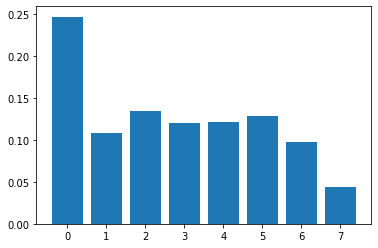

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF2 = RandomForestClassifier(n_estimators=200)
classifier_RF2.fit(descriptive_features2, target_feature)
importance_RF2 = classifier_RF2.feature_importances_
importance_RF2

# summarize feature importance
for i,v in enumerate(importance_RF2):
    if v>=0.04:  ## Only taking features having importance score > 0.04
	    print('Feature: %0d, Score: %.5f' % (i+1,v))
# plot feature importance
plt.bar([x for x in range(len(importance_RF2))], importance_RF2)
plt.show()

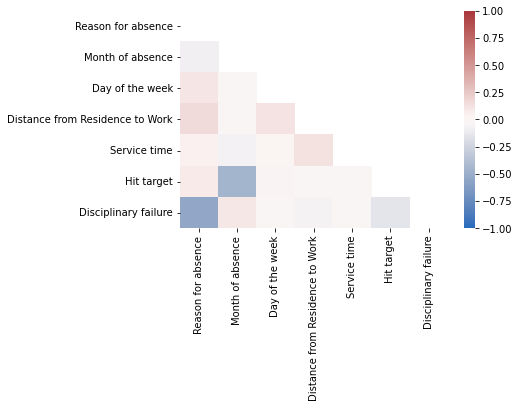

In [ ]:
corrMatrix2 = descriptive_features2.corr()
heatmap_1= corrMatrix2
mask = np.triu(np.ones_like(heatmap_1, dtype=bool))
sns.heatmap(heatmap_1, annot=False, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Feature: 1, Score: 0.24653
Feature: 2, Score: 0.10845
Feature: 3, Score: 0.13435
Feature: 4, Score: 0.12049
Feature: 5, Score: 0.12133
Feature: 6, Score: 0.12781
Feature: 7, Score: 0.09776
Feature: 8, Score: 0.04328


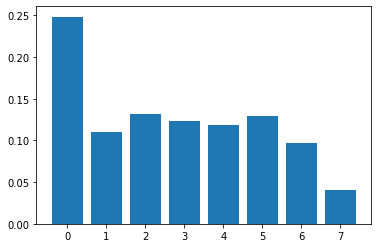

In [ ]:
from sklearn.preprocessing import RobustScaler

robust_scaled = RobustScaler().fit_transform(descriptive_features2)

from sklearn.ensemble import RandomForestClassifier
classifier_RF3 = RandomForestClassifier(n_estimators=200)
classifier_RF3.fit(robust_scaled, target_feature)
importance_RF3 = classifier_RF3.feature_importances_
importance_RF3

# summarize feature importance
for i,v in enumerate(importance_RF2):
    if v>=0.04:  ## Only taking features having importance score > 0.04
	    print('Feature: %0d, Score: %.5f' % (i+1,v))
# plot feature importance
plt.bar([x for x in range(len(importance_RF3))], importance_RF3)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


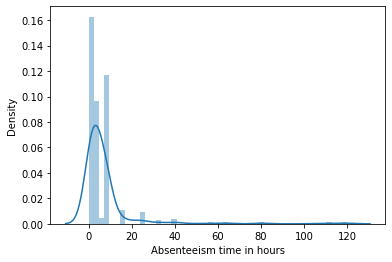

In [ ]:
#plt.hist(absenteeism_data['Absenteeism time in hours'])
sns.distplot(absenteeism_data['Absenteeism time in hours'])

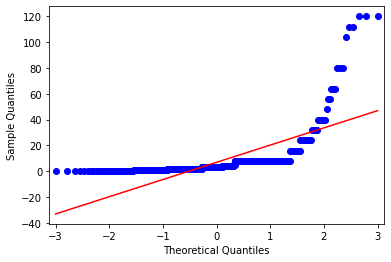

In [ ]:
fig = sm.qqplot(absenteeism_data['Absenteeism time in hours'],line='s')
plt.show()

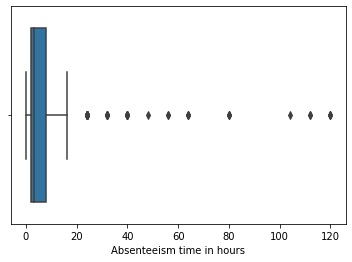

In [ ]:
import seaborn as sns
sns.boxplot(x=absenteeism_data['Absenteeism time in hours'])
